In [1]:
from scipy import fft

In [2]:
from numerov import *

In [3]:
length : float = defaultLength

In [4]:
potentialHeight : float = 1.0

In [5]:
scalar : float = 10000

In [6]:
lengthRatios : list[float] = [1.0 / 3.0, 2.0 / 3.0, 1.0]

In [7]:
potentialStepHeightRatios : list[float] = [1.0 / 3.0, 2.0 / 3.0, 1.0]

In [8]:
potentialFunction = partial(
        lambda unitLength, unitPotentialHeight, lengthRatios_, potentialStepHeightRatios_, normalizedPositions_ : \
                stairwell(
                        normalizedPositions_ + (1.0 / 2.0), \
                        unitLength, \
                        unitPotentialHeight, \
                        lengthRatios, \
                        potentialStepHeightRatios
                    ), 
        length, 
        potentialHeight, 
        lengthRatios, 
        potentialStepHeightRatios
    )

In [9]:
results = computeWaveFunction(
        potentialFunction, 
        scalingFactor = scalar, 
        length = length
    )

In [10]:
potential : np.array = results["potential"]

In [11]:
waveFunctions : np.ndarray = results["waveFunctions"]

In [12]:
energies : np.array = results["energies"]

In [13]:
normalizedPositions : np.array = results["normalizedPositions"]

In [14]:
packetPosition : float = .9

In [110]:
def makeWavePacket(uncertainty : float, normalizedWavePacketCenter : float, normalizedPositions, noZero = 1e-10): 
    width = noZero + (normalizedPositions[1:] - uncertainty) ** 2
    exponent = -(((normalizedPositions[1:] - normalizedWavePacketCenter) / width) ** 2) / 2.0
    return (1.0 / (width * np.sqrt(2 * np.pi))) * np.exp(exponent)

In [111]:
def applyWavePacket(wavePacket, waveFunction): 
    return waveFunction * wavePacket

In [119]:
wavePacket = makeWavePacket(1, 2.0 / 3.0, normalizedPositions)

In [120]:
waveFunctions = np.array(list(map(lambda waveFunction : applyWavePacket(wavePacket, waveFunction), waveFunctions)))

In [121]:
probabilityDistributions : np.ndarray = waveFunctions * np.conjugate(waveFunctions)

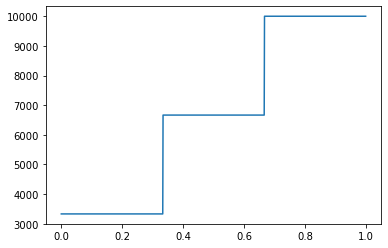

In [122]:
plt.plot(normalizedPositions, potential)

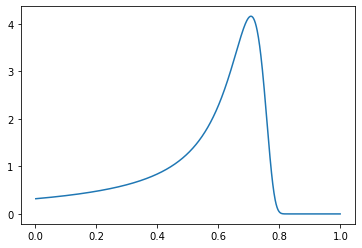

In [123]:
plt.plot(normalizedPositions[1:], wavePacket)

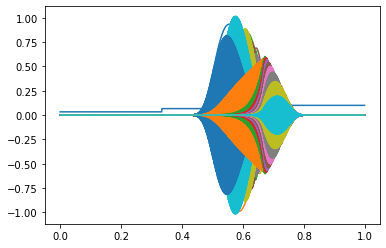

In [124]:
plt.plot(normalizedPositions, potential / scalar / 10)
for waveFunction in waveFunctions:
     plt.plot(normalizedPositions[1:], waveFunction)

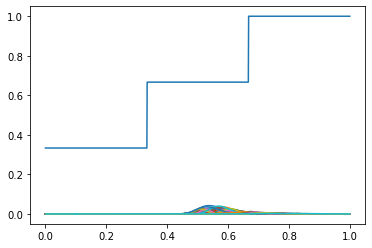

In [67]:
plt.plot(normalizedPositions, potential / potential.max())
for distribution in probabilityDistributions:
     plt.plot(normalizedPositions[1:], distribution)

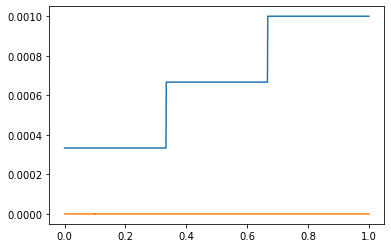

In [68]:
plt.plot(normalizedPositions, potential / potential.max() / 1000)
plt.plot(normalizedPositions[1:], waveFunctions[0])

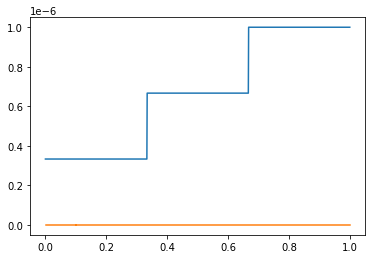

In [69]:
plt.plot(normalizedPositions, potential / scalar / 1000000)
plt.plot(normalizedPositions[1:], probabilityDistributions[0])

In [70]:
maxValues : np.array = np.array(list(map(np.max, probabilityDistributions)))
expectationValues : np.array = np.array(list(map(lambda distribution : np.sum(distribution * normalizedPositions[1:]), probabilityDistributions)))

In [71]:
mostProbablePositions : np.array = np.array(list(map(
        lambda probabilityDistribution, maxValue : np.sum(np.where(~(probabilityDistribution == maxValue), 0, normalizedPositions[1:])), 
        probabilityDistributions, 
        maxValues
    )))

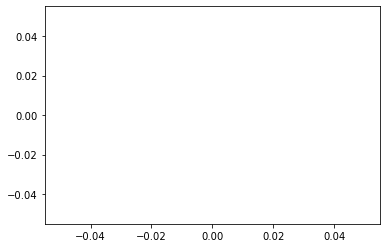

In [72]:
plt.plot(energies, maxValues)

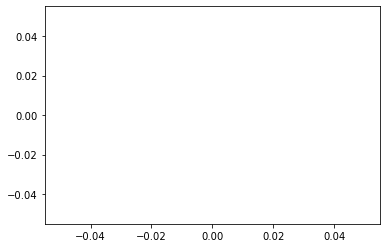

In [73]:
plt.plot(energies, expectationValues)

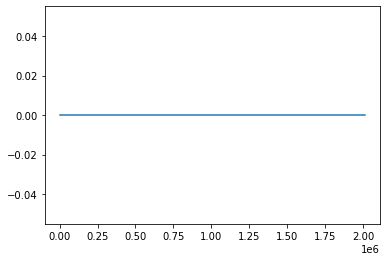

In [74]:
plt.plot(energies, mostProbablePositions)

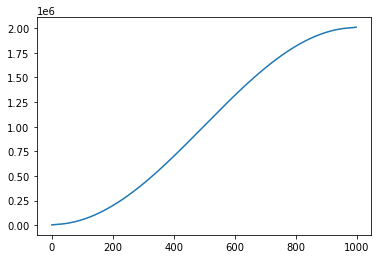

In [75]:
plt.plot(energies)

In [76]:
def binExpectationValuesToRegion(
            expectationValues : np.array, 
            lengthRatios : list, 
            unitLength : float
        ) -> np.array: 
    regionLengths : np.array = np.array([0] + lengthRatios) * unitLength
    expectationRegionBins : np.array = np.zeros(len(energies))
    for ii in range(1, len(regionLengths)): 
            expectationRegionBins = np.where(
                ~((expectationValues < regionLengths[ii]) \
                      & (expectationValues > regionLengths[ii - 1])), 
                expectationRegionBins, 
                ii
            )
    return expectationRegionBins

In [77]:
expectationRegionBins = binExpectationValuesToRegion(expectationValues, lengthRatios, length)

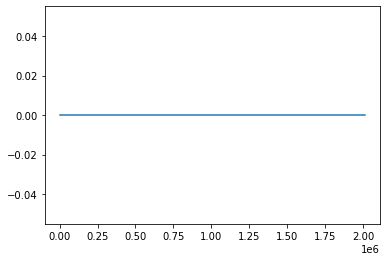

In [78]:
plt.plot(energies, expectationRegionBins)

In [79]:
maxRegionBins = binExpectationValuesToRegion(mostProbablePositions, lengthRatios, length)

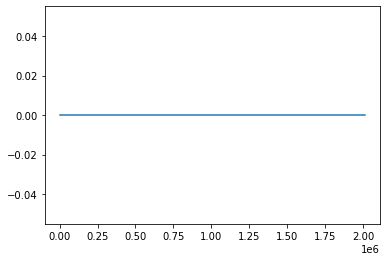

In [80]:
plt.plot(energies, maxRegionBins)

In [81]:
regionPlots : np.ndarray = np.zeros((len(lengthRatios), len(energies)))
for ii, maxRegion in enumerate(maxRegionBins): 
    regionPlots[int(maxRegion) - 1][ii] = mostProbablePositions[ii]

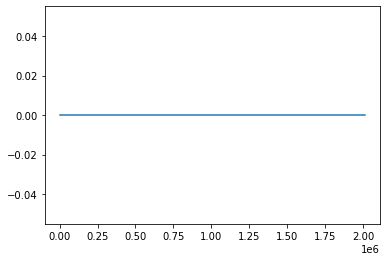

In [82]:
plt.plot(energies, regionPlots[0])

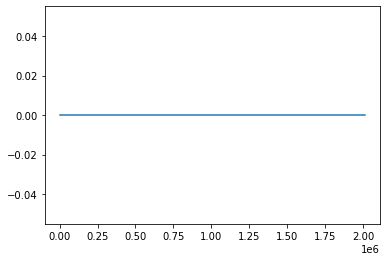

In [83]:
plt.plot(energies, regionPlots[1])

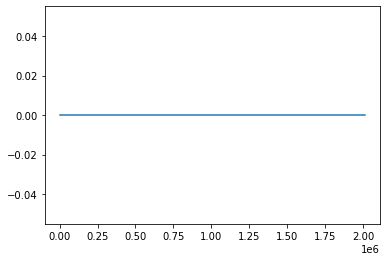

In [84]:
plt.plot(energies, regionPlots[2])

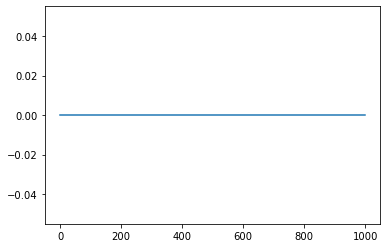

In [85]:
plt.plot(np.sort(regionPlots[2]))

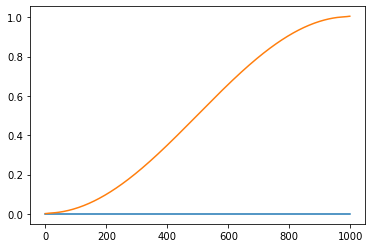

In [86]:
plt.plot(np.sort(mostProbablePositions))
plt.plot(energies / 2e6)

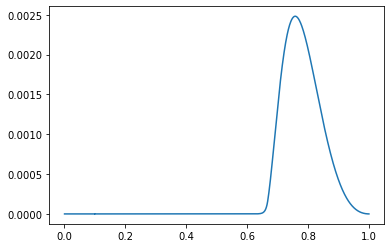

In [87]:
plt.plot(normalizedPositions[1:], probabilityDistributions[998])

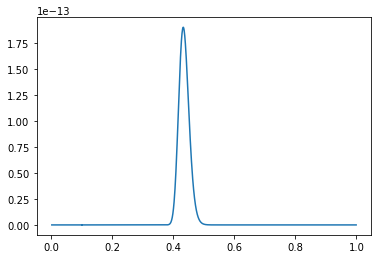

In [88]:
plt.plot(normalizedPositions[1:], probabilityDistributions[0])

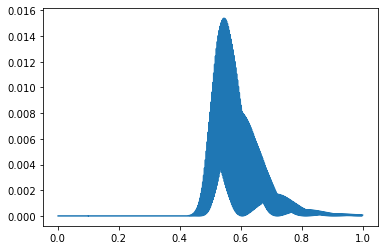

In [89]:
plt.plot(normalizedPositions[1:], probabilityDistributions[330])

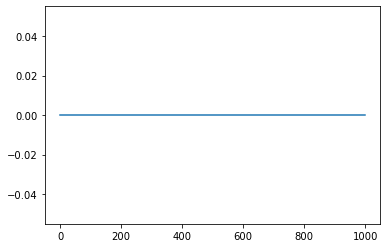

In [90]:
plt.plot(fft.fft(mostProbablePositions) * fft.fft(-1j * mostProbablePositions))

In [91]:
probabilityDistributionLength : int = len(probabilityDistributions[0])

In [92]:
medianIndex : int = round((probabilityDistributionLength - 1) / 2)

In [93]:
medians : np.array = np.array(list(map(lambda probabilityDistribution : probabilityDistribution[medianIndex], probabilityDistributions)))

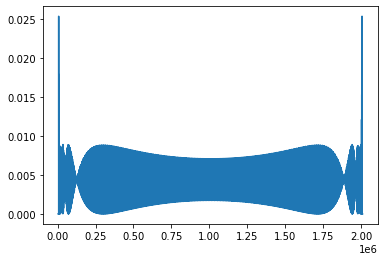

In [94]:
plt.plot(energies, medians)

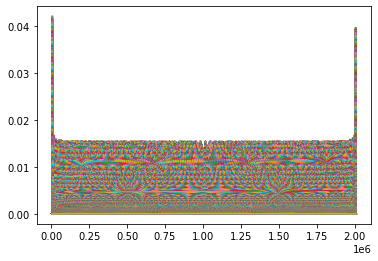

In [95]:
for randomIndex in range(probabilityDistributionLength):
    randomIndexPoints : np.array = np.array(list(map(lambda probabilityDistribution : probabilityDistribution[randomIndex], probabilityDistributions)))
    plt.plot(energies, randomIndexPoints)

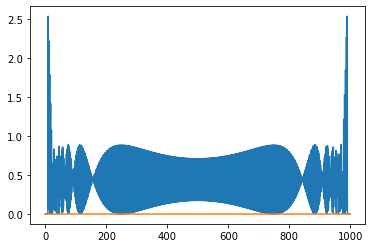

In [96]:
plt.plot(medians * 1e2)
plt.plot(mostProbablePositions)

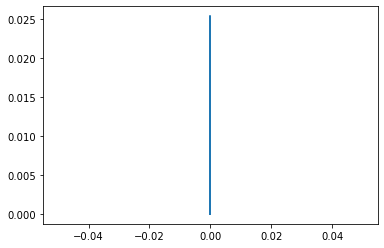

In [97]:
plt.plot(mostProbablePositions, medians)

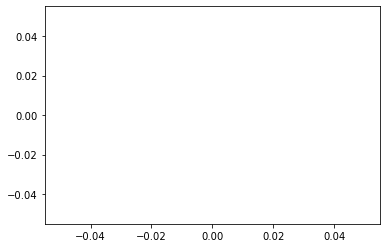

In [98]:
plt.scatter(expectationValues, medians)

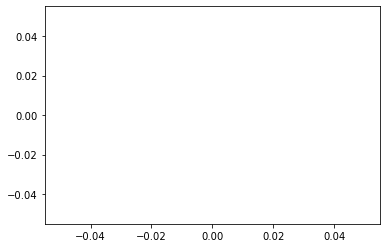

In [99]:
plt.scatter(expectationValues, mostProbablePositions)

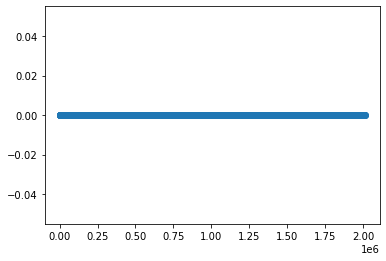

In [100]:
plt.scatter(energies, mostProbablePositions)

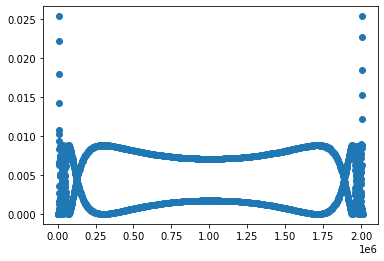

In [101]:
plt.scatter(energies, medians)

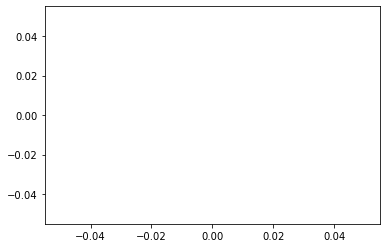

In [102]:
plt.scatter(energies, expectationValues)